# 10 MINUTES TO PANDAS

In [1]:
# title  : Chapter 5 10 MINUTES TO PANDAS
# date   : 2017.10.26
# author : Ming-Chang Lee
# email  : alan9956@gmail.com
# RWEPA  : http://rwepa.blogspot.tw/

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

# 5.1 Object Creation 建立物件

In [5]:
# Creating a Series by passing a list of values, letting pandas create a default integer index
# 建立序列(Series)

In [6]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
type(s)

pandas.core.series.Series

In [8]:
# Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns
# 建立資料框 DataFrame

In [9]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [12]:
df

,A,B,C,D
2013-01-01,-0.998928,2.185507,0.751853,-1.304037
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-04,0.238748,-0.912542,0.007839,-0.262268
2013-01-05,-0.346418,0.701990,-0.244797,2.304872
2013-01-06,1.904349,-1.628915,-0.875744,1.564478


In [13]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
# 建立資料框 DataFrame

In [14]:
df2 = pd.DataFrame({ 'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
    'D' : np.array([3] * 4,dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo' })

In [15]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [16]:
df2.dtypes 

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [17]:
# df2. 按 [Tab] 按鈕

# 5.2 Viewing Data 資料檢視

In [18]:
df

,A,B,C,D
2013-01-01,-0.998928,2.185507,0.751853,-1.304037
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-04,0.238748,-0.912542,0.007839,-0.262268
2013-01-05,-0.346418,0.701990,-0.244797,2.304872
2013-01-06,1.904349,-1.628915,-0.875744,1.564478


In [19]:
# See the top & bottom rows of the frame
# 檢視前幾筆資料, 後幾筆資料

In [20]:
df.head() # 顯示前5筆資料

,A,B,C,D
2013-01-01,-0.998928,2.185507,0.751853,-1.304037
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-04,0.238748,-0.912542,0.007839,-0.262268
2013-01-05,-0.346418,0.701990,-0.244797,2.304872


In [21]:
df.tail(3)

,A,B,C,D
2013-01-04,0.238748,-0.912542,0.007839,-0.262268
2013-01-05,-0.346418,0.701990,-0.244797,2.304872
2013-01-06,1.904349,-1.628915,-0.875744,1.564478


In [22]:
# Display the index, columns, and the underlying numpy data
# 顯示索引(index), 欄名稱(columns), 資料值

In [23]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [24]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [25]:
df.values

array([[-0.9989276 ,  2.18550699,  0.75185291, -1.30403685],
       [ 0.39037282, -0.36749024, -0.53054996, -0.73258545],
       [ 2.1077458 , -0.82490111, -0.34648249,  0.17079779],
       [ 0.23874787, -0.91254192,  0.0078394 , -0.26226811],
       [-0.34641834,  0.70199002, -0.2447968 ,  2.30487209],
       [ 1.90434934, -1.62891527, -0.87574433,  1.56447774]])

In [26]:
# 統計摘要 statistic summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.549312,-0.141059,-0.206314,0.290210
std,1.231741,1.374878,0.554678,1.384908
min,-0.998928,-1.628915,-0.875744,-1.304037
25%,-0.200127,-0.890632,-0.484533,-0.615006
50%,0.314560,-0.596196,-0.295640,-0.045735
75%,1.525855,0.434620,-0.055320,1.216058
max,2.107746,2.185507,0.751853,2.304872


In [27]:
# count 個數
# mean 平均值
# std  標準差 standard deviation, 一般希望愈小愈好
# min  最小值
# 25%  25百分位數
# 50%  50百分位數, 中位數 median
# 75%  75百分位數 (quantile)
# max  最大值

In [28]:
# 將原本長資料 Long data, 轉換為寬資料 Wide data
# 資料轉置
# | 1 2 3 4|
# | 5 6 7 8|
# 轉換為
# | 1 5|
# | 2 6|
# | 3 7|
# | 4 8|

In [29]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.998928,0.390373,2.107746,0.238748,-0.346418,1.904349
B,2.185507,-0.367490,-0.824901,-0.912542,0.701990,-1.628915
C,0.751853,-0.530550,-0.346482,0.007839,-0.244797,-0.875744
D,-1.304037,-0.732585,0.170798,-0.262268,2.304872,1.564478


In [30]:
# axis為排序的軸，0表示 rows index(列指標)，1表示columns index(行指標)，
# 當對數據列進行排序時，axis必須設置為0.

In [31]:
# df.sort(["A"]) 新版不支援sort, 改用 sort_values 或 sort_index

In [32]:
df.sort_index(axis=1, ascending=False) # ascending =FALSE 遞增是FALSE, 遞減是TRUE

,D,C,B,A
2013-01-01,-1.304037,0.751853,2.185507,-0.998928
2013-01-02,-0.732585,-0.530550,-0.367490,0.390373
2013-01-03,0.170798,-0.346482,-0.824901,2.107746
2013-01-04,-0.262268,0.007839,-0.912542,0.238748
2013-01-05,2.304872,-0.244797,0.701990,-0.346418
2013-01-06,1.564478,-0.875744,-1.628915,1.904349


In [33]:
# 依照B欄大小, 由小至大排序

In [34]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,1.904349,-1.628915,-0.875744,1.564478
2013-01-04,0.238748,-0.912542,0.007839,-0.262268
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-05,-0.346418,0.701990,-0.244797,2.304872
2013-01-01,-0.998928,2.185507,0.751853,-1.304037


# 5.3 Selection 資料選取 .at, .iat, .loc, .iloc, .ix

In [35]:
# 5.3.1 Getting 選取行,列

In [36]:
# 選取行
df['A']

2013-01-01   -0.998928
2013-01-02    0.390373
2013-01-03    2.107746
2013-01-04    0.238748
2013-01-05   -0.346418
2013-01-06    1.904349
Freq: D, Name: A, dtype: float64

In [37]:
df.A # 與 df['A'] 相同

2013-01-01   -0.998928
2013-01-02    0.390373
2013-01-03    2.107746
2013-01-04    0.238748
2013-01-05   -0.346418
2013-01-06    1.904349
Freq: D, Name: A, dtype: float64

In [38]:
# 選取列

In [39]:
df[0:4]

,A,B,C,D
2013-01-01,-0.998928,2.185507,0.751853,-1.304037
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-04,0.238748,-0.912542,0.007839,-0.262268


In [40]:
df['2013-01-02':'2013-01-04']

,A,B,C,D
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-04,0.238748,-0.912542,0.007839,-0.262268


In [41]:
# 5.3.2 Selection by Label 選取標籤
df

,A,B,C,D
2013-01-01,-0.998928,2.185507,0.751853,-1.304037
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-04,0.238748,-0.912542,0.007839,-0.262268
2013-01-05,-0.346418,0.701990,-0.244797,2.304872
2013-01-06,1.904349,-1.628915,-0.875744,1.564478


In [42]:
df.loc[dates[0]]

A   -0.998928
B    2.185507
C    0.751853
D   -1.304037
Name: 2013-01-01 00:00:00, dtype: float64

In [43]:
# Selecting on a multi-axis by label 選取多軸(列,行)

In [44]:
df.loc[:, ['A','B']]

,A,B
2013-01-01,-0.998928,2.185507
2013-01-02,0.390373,-0.367490
2013-01-03,2.107746,-0.824901
2013-01-04,0.238748,-0.912542
2013-01-05,-0.346418,0.701990
2013-01-06,1.904349,-1.628915


In [45]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.390373,-0.367490
2013-01-03,2.107746,-0.824901
2013-01-04,0.238748,-0.912542


In [46]:
df.loc['20130102',['A','B']] # 回傳值已降為1維

A    0.390373
B   -0.367490
Name: 2013-01-02 00:00:00, dtype: float64

In [47]:
df.loc[dates[0],'A']

-0.9989276024872985

In [48]:
df.at[dates[0],'A'] # .at 與 .loc 如果相同

-0.9989276024872985

In [49]:
# 5.3.3 Selection by Position 依位置選取資料

In [50]:
df.iloc[3]

A    0.238748
B   -0.912542
C    0.007839
D   -0.262268
Name: 2013-01-04 00:00:00, dtype: float64

In [51]:
df.iloc[3:5,0:2] # [第3列:第4列, 第0行:第1行] 結束位置須減1

,A,B
2013-01-04,0.238748,-0.912542
2013-01-05,-0.346418,0.701990


In [52]:
df.iloc[[1,2,4],[0,2]] # , 表示不連續範圍

,A,C
2013-01-02,0.390373,-0.530550
2013-01-03,2.107746,-0.346482
2013-01-05,-0.346418,-0.244797


In [53]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798


In [54]:
df.iloc[:,1:3]

,B,C
2013-01-01,2.185507,0.751853
2013-01-02,-0.367490,-0.530550
2013-01-03,-0.824901,-0.346482
2013-01-04,-0.912542,0.007839
2013-01-05,0.701990,-0.244797
2013-01-06,-1.628915,-0.875744


In [55]:
df.iloc[1,1]

-0.36749024223637267

In [56]:
df.iat[1,1]

-0.36749024223637267

In [57]:
# 5.3.4 Boolean Indexing 邏輯值(條件式)資料選取

In [58]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-04,0.238748,-0.912542,0.007839,-0.262268
2013-01-06,1.904349,-1.628915,-0.875744,1.564478


In [59]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,2.185507,0.751853,NaN
2013-01-02,0.390373,NaN,NaN,NaN
2013-01-03,2.107746,NaN,NaN,0.170798
2013-01-04,0.238748,NaN,0.007839,NaN
2013-01-05,NaN,0.701990,NaN,2.304872
2013-01-06,1.904349,NaN,NaN,1.564478


In [60]:
# 使用 .isin
df[df.index.isin(['2013-01-02', '2013-01-06'])]

,A,B,C,D
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-06,1.904349,-1.628915,-0.875744,1.564478


In [61]:
df.A

2013-01-01   -0.998928
2013-01-02    0.390373
2013-01-03    2.107746
2013-01-04    0.238748
2013-01-05   -0.346418
2013-01-06    1.904349
Freq: D, Name: A, dtype: float64

In [62]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.998928,2.185507,0.751853,-1.304037,one
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585,one
2013-01-03,2.107746,-0.824901,-0.346482,0.170798,two
2013-01-04,0.238748,-0.912542,0.007839,-0.262268,three
2013-01-05,-0.346418,0.701990,-0.244797,2.304872,four
2013-01-06,1.904349,-1.628915,-0.875744,1.564478,three


In [63]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,2.107746,-0.824901,-0.346482,0.170798,two
2013-01-05,-0.346418,0.701990,-0.244797,2.304872,four


In [64]:
# 5.3.5 Setting 設定值

In [65]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [66]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D
2013-01-01,0.000000,2.185507,0.751853,-1.304037
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-04,0.238748,-0.912542,0.007839,-0.262268
2013-01-05,-0.346418,0.701990,-0.244797,2.304872
2013-01-06,1.904349,-1.628915,-0.875744,1.564478


In [67]:
df.iat[0,3] = 0
df

,A,B,C,D
2013-01-01,0.000000,2.185507,0.751853,0.000000
2013-01-02,0.390373,-0.367490,-0.530550,-0.732585
2013-01-03,2.107746,-0.824901,-0.346482,0.170798
2013-01-04,0.238748,-0.912542,0.007839,-0.262268
2013-01-05,-0.346418,0.701990,-0.244797,2.304872
2013-01-06,1.904349,-1.628915,-0.875744,1.564478


In [68]:
df.loc[:,'D'] = np.array([5] * len(df)) # 將D欄改成5

In [69]:
df

,A,B,C,D
2013-01-01,0.000000,2.185507,0.751853,5
2013-01-02,0.390373,-0.367490,-0.530550,5
2013-01-03,2.107746,-0.824901,-0.346482,5
2013-01-04,0.238748,-0.912542,0.007839,5
2013-01-05,-0.346418,0.701990,-0.244797,5
2013-01-06,1.904349,-1.628915,-0.875744,5


In [70]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2013-01-01,0.000000,-2.185507,-0.751853,-5
2013-01-02,-0.390373,-0.367490,-0.530550,-5
2013-01-03,-2.107746,-0.824901,-0.346482,-5
2013-01-04,-0.238748,-0.912542,-0.007839,-5
2013-01-05,-0.346418,-0.701990,-0.244797,-5
2013-01-06,-1.904349,-1.628915,-0.875744,-5


# 5.4 Missing Data 遺漏值

In [71]:
# [0:4] 表示index為 0,1,2,3 
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,E
2013-01-01,0.000000,2.185507,0.751853,5,NaN
2013-01-02,0.390373,-0.367490,-0.530550,5,NaN
2013-01-03,2.107746,-0.824901,-0.346482,5,NaN
2013-01-04,0.238748,-0.912542,0.007839,5,NaN


In [72]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2013-01-01,0.000000,2.185507,0.751853,5,1.0
2013-01-02,0.390373,-0.367490,-0.530550,5,1.0
2013-01-03,2.107746,-0.824901,-0.346482,5,NaN
2013-01-04,0.238748,-0.912542,0.007839,5,NaN


In [73]:
# 刪除列中包括 NaN
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,2.185507,0.751853,5,1.0
2013-01-02,0.390373,-0.367490,-0.530550,5,1.0


In [74]:
# 將遺漏值填入值
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,2.185507,0.751853,5,1.0
2013-01-02,0.390373,-0.367490,-0.530550,5,1.0
2013-01-03,2.107746,-0.824901,-0.346482,5,5.0
2013-01-04,0.238748,-0.912542,0.007839,5,5.0


In [75]:
# 判斷何者為NaN
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


# 5.5 Operations 資料操作

In [76]:
# 5.5.1 Stats 統計分析

In [77]:
df

,A,B,C,D
2013-01-01,0.000000,2.185507,0.751853,5
2013-01-02,0.390373,-0.367490,-0.530550,5
2013-01-03,2.107746,-0.824901,-0.346482,5
2013-01-04,0.238748,-0.912542,0.007839,5
2013-01-05,-0.346418,0.701990,-0.244797,5
2013-01-06,1.904349,-1.628915,-0.875744,5


In [78]:
df.mean()

A    0.715800
B   -0.141059
C   -0.206314
D    5.000000
dtype: float64

In [79]:
# 計算每列平均
df.mean(1)

2013-01-01    1.984340
2013-01-02    1.123083
2013-01-03    1.484091
2013-01-04    1.083511
2013-01-05    1.277694
2013-01-06    1.099922
Freq: D, dtype: float64

In [80]:
# 計算每行平均
df.mean(0)

A    0.715800
B   -0.141059
C   -0.206314
D    5.000000
dtype: float64

In [81]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [82]:
# 移動2個位置
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [83]:
df

,A,B,C,D
2013-01-01,0.000000,2.185507,0.751853,5
2013-01-02,0.390373,-0.367490,-0.530550,5
2013-01-03,2.107746,-0.824901,-0.346482,5
2013-01-04,0.238748,-0.912542,0.007839,5
2013-01-05,-0.346418,0.701990,-0.244797,5
2013-01-06,1.904349,-1.628915,-0.875744,5


In [84]:
# 每行數值 減1
df.sub(s, axis='index')
#  0.750356  -1 = -0.249644
# -0.335855 - 3 = -3.335855
#  0.901004 - 5 = -4.098996

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,1.107746,-1.824901,-1.346482,4.0
2013-01-04,-2.761252,-3.912542,-2.992161,2.0
2013-01-05,-5.346418,-4.298010,-5.244797,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [85]:
# 5.5.2 Apply 將資料套用至函數

In [86]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,2.185507,0.751853,5
2013-01-02,0.390373,1.818017,0.221303,10
2013-01-03,2.498119,0.993116,-0.125180,15
2013-01-04,2.736866,0.080574,-0.117340,20
2013-01-05,2.390448,0.782564,-0.362137,25
2013-01-06,4.294797,-0.846352,-1.237881,30


# 5.6 Merge 合併

In [87]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.423251,-0.374177,0.074201,-0.561322
1,0.804563,0.937866,-0.625357,1.694440
2,-0.588543,0.739323,1.140973,0.639604
3,0.085331,0.525894,-0.709841,0.710441
4,2.661910,0.479934,0.209114,0.623522
5,-0.949040,0.106378,0.238834,0.307373
6,0.750519,-0.518173,1.439009,0.679393
7,1.657611,-0.343610,-0.935255,1.771090
8,0.167039,-0.198510,2.494365,0.511782
9,-0.114486,0.769380,0.379557,-0.466036


In [88]:
pieces = [df[:3], df[4:7], df[8:]]
pieces

[          0         1         2         3
 0 -0.423251 -0.374177  0.074201 -0.561322
 1  0.804563  0.937866 -0.625357  1.694440
 2 -0.588543  0.739323  1.140973  0.639604,
           0         1         2         3
 4  2.661910  0.479934  0.209114  0.623522
 5 -0.949040  0.106378  0.238834  0.307373
 6  0.750519 -0.518173  1.439009  0.679393,
           0        1         2         3
 8  0.167039 -0.19851  2.494365  0.511782
 9 -0.114486  0.76938  0.379557 -0.466036]

In [89]:
# 列合併, 類似R的 rbind
pd.concat(pieces)

,0,1,2,3
0,-0.423251,-0.374177,0.074201,-0.561322
1,0.804563,0.937866,-0.625357,1.694440
2,-0.588543,0.739323,1.140973,0.639604
4,2.661910,0.479934,0.209114,0.623522
5,-0.949040,0.106378,0.238834,0.307373
6,0.750519,-0.518173,1.439009,0.679393
8,0.167039,-0.198510,2.494365,0.511782
9,-0.114486,0.769380,0.379557,-0.466036


In [90]:
# 5.6.2 Join, 執行SQL join

In [91]:
# 範例 1
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [92]:
left

,key,lval
0,foo,1
1,foo,2


In [93]:
right

,key,rval
0,foo,4
1,foo,5


In [94]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [95]:
# 範例 2
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [96]:
left

,key,lval
0,foo,1
1,bar,2


In [97]:
right

,key,rval
0,foo,4
1,bar,5


In [98]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [99]:
# 5.6.3 Append 附加

In [100]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.106635,-0.669518,-1.762656,0.179844
1,1.073849,-2.449787,1.476516,0.114435
2,-1.136257,-0.868737,0.596180,-0.628735
3,1.589795,-0.737994,0.451718,-0.690233
4,0.064031,1.199017,1.348096,-0.403475
5,0.326931,1.355333,1.288992,0.794267
6,1.368845,0.715387,-0.344909,-0.139759
7,-1.219321,-0.737749,-2.483591,-0.280870


In [101]:
s = df.iloc[3]
s

A    1.589795
B   -0.737994
C    0.451718
D   -0.690233
Name: 3, dtype: float64

In [102]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.106635,-0.669518,-1.762656,0.179844
1,1.073849,-2.449787,1.476516,0.114435
2,-1.136257,-0.868737,0.596180,-0.628735
3,1.589795,-0.737994,0.451718,-0.690233
4,0.064031,1.199017,1.348096,-0.403475
5,0.326931,1.355333,1.288992,0.794267
6,1.368845,0.715387,-0.344909,-0.139759
7,-1.219321,-0.737749,-2.483591,-0.280870
8,1.589795,-0.737994,0.451718,-0.690233


# 5.7 Grouping 群組計算

In [103]:
df = pd.DataFrame({
    'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)})

In [104]:
df

,A,B,C,D
0,foo,one,0.265475,-0.429890
1,bar,one,0.389803,-0.167613
2,foo,two,-0.718020,0.698566
3,bar,three,-0.245010,-0.783149
4,foo,two,2.589769,0.553511
5,bar,two,-0.529493,1.189680
6,foo,one,-0.834124,0.417325
7,foo,three,1.098132,-1.364973


In [105]:
df.groupby('A').sum() # 類似 R- aggregate

,C,D
A,,
bar,-0.384700,0.238918
foo,2.401233,-0.125461


In [106]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.389803 -0.167613
    three -0.245010 -0.783149
    two   -0.529493  1.189680
foo one   -0.568649 -0.012564
    three  1.098132 -1.364973
    two    1.871749  1.252077

# 5.8 Reshaping 改變形狀(維度)

In [107]:
# 5.8.1 Stack

In [108]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [109]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [110]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.709671  2.944327
      two     0.972640 -0.386374
baz   one    -0.381867 -0.469785
      two     0.497129 -0.121921
foo   one    -0.717862 -0.984652
      two    -1.791940  0.691156
qux   one    -0.114843  1.171304
      two     0.495736 -0.678878

In [111]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.709671  2.944327
      two     0.972640 -0.386374
baz   one    -0.381867 -0.469785
      two     0.497129 -0.121921

In [112]:
# 類似 R - reshape2 套件
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.709671
               B    2.944327
       two     A    0.972640
               B   -0.386374
baz    one     A   -0.381867
               B   -0.469785
       two     A    0.497129
               B   -0.121921
dtype: float64

In [113]:
stacked.unstack()

A         B
first second                    
bar   one     0.709671  2.944327
      two     0.972640 -0.386374
baz   one    -0.381867 -0.469785
      two     0.497129 -0.121921

In [114]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.709671  0.972640
      B  2.944327 -0.386374
baz   A -0.381867  0.497129
      B -0.469785 -0.121921

In [115]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.709671 -0.381867
       B  2.944327 -0.469785
two    A  0.972640  0.497129
       B -0.386374 -0.121921

In [116]:
# 5.8.2 Pivot Tables

In [117]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
 'B' : ['A', 'B', 'C'] * 4,
 'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
 'D' : np.random.randn(12),
 'E' : np.random.randn(12)})

In [118]:
df

,A,B,C,D,E
0,one,A,foo,0.990179,0.816507
1,one,B,foo,1.639255,-1.476792
2,two,C,foo,-0.777993,0.841459
3,three,A,bar,-0.473704,1.150066
4,one,B,bar,-0.798508,-0.760996
5,one,C,bar,0.089384,0.962164
6,two,A,foo,1.207553,-0.676810
7,three,B,foo,-0.358285,0.280999
8,one,C,foo,1.283466,0.590190
9,one,A,bar,-1.889597,0.666718


In [119]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.889597  0.990179
      B -0.798508  1.639255
      C  0.089384  1.283466
three A -0.473704       NaN
      B       NaN -0.358285
      C  0.805051       NaN
two   A       NaN  1.207553
      B -0.913712       NaN
      C       NaN -0.777993

# 5.9 Time Series 時間序列

In [120]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [121]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [122]:
ts

2012-01-01 00:00:00    233
2012-01-01 00:00:01    278
2012-01-01 00:00:02    417
2012-01-01 00:00:03    370
2012-01-01 00:00:04     15
2012-01-01 00:00:05    232
2012-01-01 00:00:06    370
2012-01-01 00:00:07    357
2012-01-01 00:00:08     46
2012-01-01 00:00:09    398
2012-01-01 00:00:10      0
2012-01-01 00:00:11    419
2012-01-01 00:00:12    225
2012-01-01 00:00:13    249
2012-01-01 00:00:14     74
2012-01-01 00:00:15    353
2012-01-01 00:00:16    235
2012-01-01 00:00:17     41
2012-01-01 00:00:18    123
2012-01-01 00:00:19    169
2012-01-01 00:00:20      8
2012-01-01 00:00:21    278
2012-01-01 00:00:22     56
2012-01-01 00:00:23    202
2012-01-01 00:00:24      3
2012-01-01 00:00:25    277
2012-01-01 00:00:26    489
2012-01-01 00:00:27    259
2012-01-01 00:00:28    167
2012-01-01 00:00:29     72
                      ... 
2012-01-01 00:01:10     98
2012-01-01 00:01:11    447
2012-01-01 00:01:12    234
2012-01-01 00:01:13    296
2012-01-01 00:01:14    461
2012-01-01 00:01:15    294
2

In [123]:
ts.resample('5Min').sum()

2012-01-01    25137
Freq: 5T, dtype: int32

In [124]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [125]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.036311
2012-03-07   -1.413176
2012-03-08   -0.275575
2012-03-09   -1.782726
2012-03-10    0.583765
Freq: D, dtype: float64

In [126]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.036311
2012-03-07 00:00:00+00:00   -1.413176
2012-03-08 00:00:00+00:00   -0.275575
2012-03-09 00:00:00+00:00   -1.782726
2012-03-10 00:00:00+00:00    0.583765
Freq: D, dtype: float64

In [127]:
# 間隔一個月
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [128]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.410047
2012-02-29   -1.166528
2012-03-31    0.299548
2012-04-30    1.107402
2012-05-31   -0.116937
Freq: M, dtype: float64

In [129]:
# to_period() 轉換為期間
ps = ts.to_period()
ps

2012-01   -1.410047
2012-02   -1.166528
2012-03    0.299548
2012-04    1.107402
2012-05   -0.116937
Freq: M, dtype: float64

In [130]:
# to_timestamp 轉換為時間戳記
ps.to_timestamp()

2012-01-01   -1.410047
2012-02-01   -1.166528
2012-03-01    0.299548
2012-04-01    1.107402
2012-05-01   -0.116937
Freq: MS, dtype: float64

# 5.10 Categoricals 類別資料型別

In [131]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [132]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [133]:
# category 與 R - factor 類似
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [134]:
# 更改名稱
df["grade"].cat.categories = ["1very good", "2good", "3very bad"]
df

,id,raw_grade,grade
0,1,a,1very good
1,2,b,2good
2,3,b,2good
3,4,a,1very good
4,5,a,1very good
5,6,e,3very bad


In [135]:
s = df["grade"]
s

0    1very good
1         2good
2         2good
3    1very good
4    1very good
5     3very bad
Name: grade, dtype: category
Categories (3, object): [1very good, 2good, 3very bad]

In [136]:
s.cat.categories

Index(['1very good', '2good', '3very bad'], dtype='object')

In [137]:
s.cat.ordered

False

In [138]:
# need to verify (原始:3個levels, 修改為5個levels)
# df["grade"] = df["grade"].cat.set_categories(["01very bad", "02bad", "03medium", "04good", "05very good"])
# df["grade"]

# Plotting 繪圖

In [139]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [140]:
ts = ts.cumsum()

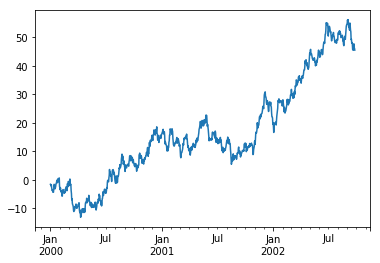

In [141]:
ts.plot()
plt.show()

In [142]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [143]:
df = df.cumsum()

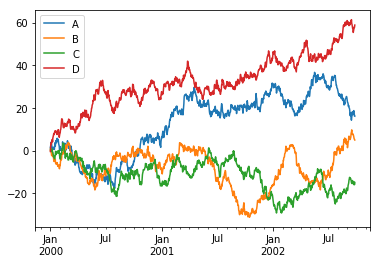

In [144]:
df.plot(); plt.legend(loc='best');plt.show()

# 5.12 Getting Data In/Out 輸入/輸出資料

In [145]:
# 5.12.1 CSV

In [146]:
df.to_csv('foo.csv')

In [147]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.471648,-0.095672,0.695256,-0.454178
1,2000-01-02,2.374581,0.326491,-0.196729,2.024452
2,2000-01-03,3.710590,-0.464819,-0.390687,3.542863
3,2000-01-04,3.991232,-1.245558,0.094889,3.190852
4,2000-01-05,2.973597,-2.410365,0.322074,4.036789
5,2000-01-06,1.014745,-2.047275,0.710256,4.536079
6,2000-01-07,0.248988,-1.253870,0.756067,5.190612
7,2000-01-08,0.716458,-1.413147,-0.887308,4.056805
8,2000-01-09,0.899794,-2.848726,-0.903842,5.897361
9,2000-01-10,1.580413,-1.961863,-2.063585,6.481942


In [148]:
# 5.12.2 HDF5

In [149]:
df.to_hdf('foo.h5','df')

In [150]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,1.471648,-0.095672,0.695256,-0.454178
2000-01-02,2.374581,0.326491,-0.196729,2.024452
2000-01-03,3.710590,-0.464819,-0.390687,3.542863
2000-01-04,3.991232,-1.245558,0.094889,3.190852
2000-01-05,2.973597,-2.410365,0.322074,4.036789
2000-01-06,1.014745,-2.047275,0.710256,4.536079
2000-01-07,0.248988,-1.253870,0.756067,5.190612
2000-01-08,0.716458,-1.413147,-0.887308,4.056805
2000-01-09,0.899794,-2.848726,-0.903842,5.897361
2000-01-10,1.580413,-1.961863,-2.063585,6.481942


In [151]:
# 5.12.3 Excel

In [152]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [153]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,1.471648,-0.095672,0.695256,-0.454178
2000-01-02,2.374581,0.326491,-0.196729,2.024452
2000-01-03,3.710590,-0.464819,-0.390687,3.542863
2000-01-04,3.991232,-1.245558,0.094889,3.190852
2000-01-05,2.973597,-2.410365,0.322074,4.036789
2000-01-06,1.014745,-2.047275,0.710256,4.536079
2000-01-07,0.248988,-1.253870,0.756067,5.190612
2000-01-08,0.716458,-1.413147,-0.887308,4.056805
2000-01-09,0.899794,-2.848726,-0.903842,5.897361
2000-01-10,1.580413,-1.961863,-2.063585,6.481942


In [154]:
# end